This notebook uses data offered by [Eurostat - Poverty](https://ec.europa.eu/eurostat/databrowser/view/ILC_PEPS01N/default/table?lang=en&category=livcon.ilc.ilc_pe.ilc_peps), [Eurostat - Country Codes](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes), and [Wikipedia](https://en.wikipedia.org/wiki/Demographics_of_the_European_Union). Some of these datasets have been slightly manipulated to fit the educational purposes of the notebook. 

# Data Cleaning

In this notebook, you will learn how to go from raw data you find in the Internet, to a clean and usable dataset ready for your visualization or analysis. For this purpose, we will revise and extend your knowledge of `pandas` and look into: 
- Reading data 
- Rename and drop columns
- Data transformation
- Dealing with duplicates
- Merging datasets
- Missing data

Except for the first step, the chosen order is not meaningful in any way. This is simply a list of different skills you would benefit from learning. The particular order in which you apply them to your dataset (and whether you apply them at all) will depend on its particularities and your preferences. 

Lastly, to contextualize and guide this practical, we are going to study the link between the percentage of people at poverty risk and the population of a country. We will contain our research to countries in the European Union. We will access two main datasets. One is from Eurostat and contains the proportion of people at risk of poverty in EU countries in different years. The second comes from Wikipedia (data from Eurostat) and it simply contains the population of each country in the EU based on a recent year. After processing, cleaning and merging these two datasets, we will be able to create a quick visualization to answer our question: is there a link between population and poverty for countries in the EU? 

Let's get started! 

In [1]:
# IMPORT NECESSARY PACKAGES

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

## Reading data 

Before any processing can be done on the data, we need our Python file to read it. There are different types of data files, but most common ones are `csv`, `tsv`, `xlsx` and `json`. Although all of these are different, you can use different functions in `pandas` to read any of them into a Data Frame (look up `pandas` and the file format you are working with to find the name and documentation of the exact function).

#### Exercise 1: 
Use `pandas` to read the `ilc_peps01n_page_tabular.tsv` file in the folder `data` into a Data Frame called `pov_df`. You can use `pandas` documentation or the _seaborn_ assignment from last semester if you need some clues. 

Taking a look at the data, it seems to be that '`:`' was chosen to represent `NA` values in this data set. It is important to specify this in the function you use to read the data.

**Hint:** Use `.head()` and `.shape` to get an overview of the data.

In [4]:
# YOUR CODE HERE
filepath = "E:\\Csci_2\\data_cleaning\\data\\ilc_peps01n_page_tabular.tsv"
pov_df = pd.read_csv(filepath)
pov_df.head

<bound method NDFrame.head of    freq unit    age sex  \
0     A  PRP  TOTAL   T   
1     A  PRP  TOTAL   T   
2     A  PRP  TOTAL   T   
3     A  PRP  TOTAL   T   
4     A  PRP  TOTAL   T   
5     A  PRP  TOTAL   T   
6     A  PRP  TOTAL   T   
7     A  PRP  TOTAL   T   
8     A  PRP  TOTAL   T   
9     A  PRP  TOTAL   T   
10    A  PRP  TOTAL   T   
11    A  PRP  TOTAL   T   
12    A  PRP  TOTAL   T   
13    A  PRP  TOTAL   T   
14    A  PRP  TOTAL   T   
15    A  PRP  TOTAL   T   
16    A  PRP  TOTAL   T   
17    A  PRP  TOTAL   T   
18    A  PRP  TOTAL   T   
19    A  PRP  TOTAL   T   
20    A  PRP  TOTAL   T   
21    A  PRP  TOTAL   T   
22    A  PRP  TOTAL   T   
23    A  PRP  TOTAL   T   
24    A  PRP  TOTAL   T   
25    A  PRP  TOTAL   T   
26    A  PRP  TOTAL   T   
27    A  PRP  TOTAL   T   
28    A  PRP  TOTAL   T   
29    A  PRP  TOTAL   T   
30    A  PRP  TOTAL   T   
31    A  PRP  TOTAL   T   
32    A  PRP  TOTAL   T   
33    A  PRP  TOTAL   T   
34    A  PRP  TOTAL   T  

#### Exercise 2:

The table we just read gives us information regarding poverty in EU countries. Let's now read the dataset containing population information. It can also be found in the folder `data` under the name `population_wkp_eu.db`. This is an SQL Database. 

***Question*:** How would you distinguish between a SQL database and csv/tsv files? 

To read the data from a `db` file, we will use the `pandas` function `read_sql_query` that transforms the data into a DataFrame. Later in the semester, we will dive into the SQL databases. For this session, we just want to focus on data cleaning using Python and pandas. That's why we provided you with the code accessing the `db` file below.

First, we need to make a 'connection' between our Python file and the database. For this, we use the package `sqlite3`. Then, we need to set a 'query' to specify what we want to get from this database. 

*Do you need to change the path in this code?*

In [5]:
database = "data/population_wkp_eu.db"
conn = sqlite3.connect(database)
# we want to access the data stored as a table named "population" in this db file
query = "SELECT * FROM population"

Now that we defined the 'connection' and the 'query', we can use `read_sql_query` function to read the specified table ("population") from the database into a pandas DataFrame. We will call it `pop_df`.

In [6]:
pop_df = pd.read_sql_query(query, conn)

*How does your data look like?*

*What are the variables?*

In [8]:
# YOUR CODE HERE
pop_df.head
pop_df.columns

Index(['index', 'Member State', 'Population', 'Percentof total EU-27 pop.',
       'Total area km2', 'Percentof total EU-27 area',
       'Pop. density People/km2', 'Source'],
      dtype='object')

#### Exercise 3: 

We almost have read all the data we need: we have a DataFrame involving poverty in the EU and another one with the population of its member states. However, these two datasets refer to countries with different values: `pov_df` identifies countries by their ISO-2 code and `pop_df` identifies them by their whole name. To be able to connect them later, we need to learn the ISO-2 codes of EU countries.

This information is easy to find in the web. One method to automatically obtain data from websites is called **web scraping**. You will learn more about that in your next semester. But now, we will apply a very simple form of it, using the `read_html()` method of `pandas`. It reads data tables from websites directly into DataFrames. 

A table with EU countries and their ISO-2 code can be found in [this page](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes). Look up the documentation of `pd.read_html()`, and read the table containing ISO codes and whole country names from this website. 

Name this new DataFrame as `iso_df`. Explore it using `type()`, `.head()`, and `.shape`.

In [11]:
# YOUR CODE HERE
url = "https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes"
tables = pd.read_html(url)
len(tables)
for i, table in enumerate(tables):
    print(f"Table {i}:\n")
    print(table.head(), "\n")
iso_df = tables[0]

print(type(iso_df))
print(iso_df.head())
print(iso_df.shape)


Table 0:

          0     1        2     3            4     5         6     7
0   Belgium  (BE)   Greece  (EL)    Lithuania  (LT)  Portugal  (PT)
1  Bulgaria  (BG)    Spain  (ES)   Luxembourg  (LU)   Romania  (RO)
2   Czechia  (CZ)   France  (FR)      Hungary  (HU)  Slovenia  (SI)
3   Denmark  (DK)  Croatia  (HR)        Malta  (MT)  Slovakia  (SK)
4   Germany  (DE)    Italy  (IT)  Netherlands  (NL)   Finland  (FI) 

Table 1:

               0     1   2            3     4
0        Iceland  (IS) NaN       Norway  (NO)
1  Liechtenstein  (LI) NaN  Switzerland  (CH) 

Table 2:

                        0     1
0  Bosnia and Herzegovina  (BA)
1              Montenegro  (ME)
2                 Moldova  (MD)
3         North Macedonia  (MK)
4                 Georgia  (GE) 

Table 3:

         0        1
0  Kosovo*  (XK[1]) 

Table 4:

            0     1
0     Armenia  (AM)
1     Belarus  (BY)
2  Azerbaijan  (AZ) 

Table 5:

         0     1   2              3     4   5        6     7
0  Algeria 

**Question:** *How many tables did you extract from the website?* 

**Question:** *What kind of variable is `iso_df` and what kind of variables does it store?* 

You might have realized that: A) there are too many tables in this page that are irrelevant to our needs and B) the table you need is not aligned correctly. Therefore, we need to take some extra cleaning steps after reading it. In this exercise, let's focus on the problem A and try to extract the correct table. 

## Rename and drop columns

These datasets contain all the information we need to answer our question regarding poverty and population in the EU. Nonetheless, much processing is needed before we can create a nice visualization from them. One first step that would make all successive tasks much easier is to rename columns so they are easy to access, and drop (i.e. delete) columns that are not relevant so our DataFrames are smaller and easier to work with. We will do this for each of our three datasets. 

#### Exercise 4:

We will start with `pov_df`. Forget about the first column for now. The other column names referring to the year in which data was collected are problematic. Print them with `pov_df.columns` and check if you can detect the problem.

In [12]:
# YOUR CODE HERE
pov_df.columns

Index(['freq', 'unit', 'age', 'sex',
       'geo\TIME_PERIOD\t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 \t2022 '],
      dtype='object')

There is an unnecessary space after each date... If we do not realize that, we may struggle to index columns later on because, for example, `pov_df['2021']` would actually not work. To fix this, clean all spaces in the column names.

**Hint**: You can perform a for loop over `pov_df.columns` where you delete spaces in the string. And, `.replace` method could be useful for that...

In [17]:
# YOUR CODE HERE
pov_df.columns = [col.strip().replace(" ", "") for col in pov_df.columns]

Let's look at the first column. What a horrible creature... Although right now it looks like a mess, hidden in there we have an ISO-2 code that identifies each of the countries. Now, we will only change its name to `ISO-2`. In the next section, we will clean this column further.

In [ ]:
# YOUR CODE HERE


We are not going to use all the columns for our analysis but rather pick a year to analyse. Nevertheless, we still don't know which one it is, so we don't want to drop any columns yet. 

#### Exercise 5:

If you look into `pop_df`, you can see that its columns do not have any problem or have extremely terrible names. We will leave them as they are. Because the purpose of using `pop_df` is the population size of each EU country, we are interested in the columns `Member State` and `Population`. We will also keep the `Source` column as it contains relevant information. We would also keep any other metadata $^1$ related to our variables of interest (e.g. date of data collection). 

$^1$ Data that describes other data, as in describing the origin, structure, or characteristics of computer files, webpages, databases, or other digital resources.

Redefine `pop_df` so that it only contains relevant columns.

In [ ]:
# YOUR CODE HERE


#### Exercise 6:

Back to `iso_df`, we still need to solve problem B. In exercise 3, we succefully figured out which table is the one we need and coverted it into a DataFrame. If the original form of EU ISO (country code) has 8 columns and 7 rows, you are on the right track. However, `iso_df` does not look organized. Think about how to make this into DataFrames with 2 columns, instead of 8, for `Country` and `Country Code`. You can approach this with various solutions, perhaps using `stack()` or `combine()` or `append`. 

Also, how do you plan to remove the parantheses from the data values? And the NaN values, if there are any? Apply these to your `iso_df`.

**Important:** After manipulating the columns, it is very important you reset the index (`iso_df.reset_index(drop = True)`).

In [ ]:
# YOUR CODE HERE


## Data transformation

In this section, we are going to look into data transformation and change the data values in the cells. This step is not always required and the cleaner your dataset is the less likely it is you need to perform it. In our case, and as you may have already noticed when taking an overview of `pov_df`, this is necessary. 

An important general rule here is to always keep your original raw data backed up. In our case, the files in the folder `data` remain unchanged. Thus, if at any point we realize that our transformation was not in place, we can go back to the original file and start again. 

#### Exercise 7:
One very clear problem we have is the first column of `pov_df`. Because of how the data was stored, information about frequency, unit of measurement, sex and geographical region are crowded in one single column. In our case, we are only interested in the the geographical region (i.e. ISO-2 code). Thus, what we want to do is to clean everything up to the last comma in each cell of this column. For example, the first row value will be transformed as:

<p style="text-align: center;"> A,PC,TOTAL,T,AL &rarr; AL</p>

There are different ways of achieving this. First, try to come up with a solution using your previous knowledge and creativity. If you cannot find a useful method in your memory, use Google or AI. 

In Figure 1, you can see how the first 9 rows of this new DataFrame should look like at the end of this exercise.

**Figure 1**

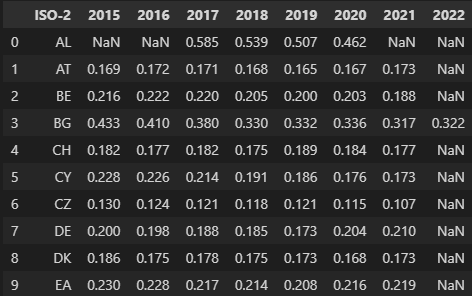

In [ ]:
# YOUR CODE HERE


<details markdown="1"><summary  markdown="span">Solution Idea</summary>

Run a for loop over the column `ISO-2`, and for each item, you keep only the elements after the last comma. Given that each item is a string, you could do this step using the `.split()` method. You can store the transformed data values in a new list and redefine the column `ISO-2` equal to this new list.  

</details>

#### Exercise 8:
The `pov_df` DataFrame is already looking much more usable but there are other things we may want to change. For instance, we may prefer the unit used in the DataFrame to be percentage instead of proportions. In this case, it is a matter of taste (I believe the layperson is more used to seeing percentages than proportions). Nevertheless this sort of transformation is sometimes required (e.g. change from Dollar to Euro, change from Kg to tons). In this case, we want to end up with the same DataFrame but with every numerical cell (excluding the country names) multiplied by 100. There are different ways of doing this. We again encourage you to use your imagination and **Google(!)** to try and solve it yourself.

In [ ]:
# YOUR CODE HERE


<details markdown="1"><summary  markdown="span">Solution Idea</summary>

First, get all columns after the first one into a list. Then, do a for loop over this list and multiply every column with 100. However for that, you may need to transform each column into an `np.array`.  When you finish your transformation, store this version in your DataFrame.  

</details>

## Dealing with duplicates

Either after some clumsy transformation or in the original dataset we download, we often end up with some duplicates (i.e. different rows that refer to the same case/participant/country...). We differentiate between three types of duplicates: complete duplicates, partial duplicates and duplicates with different keys. Let's look at what they are, how to find them and what to do with them.

Note that here we give some general advice on what to do with duplicates and apply this logic in our exercises. Nonetheless, each dataset should be considered independently and decisions should be made based on its characteristics.

#### Exercise 9:

A complete duplicate refers to two or more rows that are identical. They are easy to deal with. Because they give the exact same information, deleting all but one should fix the problem. Furthermore, they are also easy to find: explore the documentation on `pd.drop_duplicates()` and check if we have any complete duplicates in any of our DataFrames. 

Print their `.shape` before and after `pd.drop_duplicates()` to see if there has been any changes in the number of rows. 

In [ ]:
# YOUR CODE HERE


#### Exercise 10:
As we can see, there seems to be no complete duplicates in our DataFrames. It could be the case, nevertheless, that two rows are different in some columns but are identical in the columns we are interested in (i.e. partial duplicate). For instance, `pop_df` may contain a row with the same country name and population value, but with a different population density value. We would be safe deleting any row that only differed from another one in the population density value. Sometimes, nonetheless, the column in which two rows differ is relevant. For instance, it may contain the date when the data was collected. In this case, we would not want to simply `pd.drop_duplicates()` and keep the first row, but rather check them and keep the one with the most recent date. In sum, when looking for partial duplicates, it is best to first display them and delete them only after inspection. This can be done using `pd.duplicated()`. 

Use this function and display those columns in `pop_df` that have the same `Member State` value (i.e. that are partial duplicates when looking at `Member State`). Notice that we want to display ALL rows with the same `Member State` value, not only the first or only the second occurrence. 

In [ ]:
# YOUR CODE HERE


We can see that there are indeed some partial duplicates. Cyprus, Estonia and Poland have two different population values, one provided by Eurostat and the other by WorldInData. Now that we have inspected the duplicates, we can confidently decide to keep the one of the occurrences, in this case the row containing the more reliable data (i.e. Eurostat). 

Delete the displayed duplicates with data from WorldInData. 

In [ ]:
# YOUR CODE HERE


#### Exercise 11:

Finally, we may find rows that refer to the same case but have a different key $^1$. For instance, a DataFrame may have an entry for `DE` (i.e. Germany's ISO-2 code) and another one for `Germany`, both containing the same data about Germany. This could happen for different reasons and it is crucial and more difficult to identify. There is no function that can do it for you automatically. Sometimes the documentation of the dataset tells you what to look for. Maybe after you summarize the data (e.g. into a barplot), you will notice that a certain single case appears twice with different names (e.g. USA and North America). If there are not too many rows in your dataset, you can print and examine the key column looking for names that may refer to the same case. Use this method to see if there are any keys in `pov_df` that may refer to the same country; see if they are indeed duplicates and, if so, only keep one. 

Do not forget to `reset_index()` after deleting any rows in your DataFrame!

$^1$ A key is a column that uniquely identifies a row (e.g. the country name in our datasets).

In [ ]:
# YOUR CODE HERE


## Missing data

A key aspect of data processing is dealing with missing data (i.e. `NA` values). One first step we took care of at the very beginning was identifying what character represented missing data in our datasets. In the case of `pov_df`, this was '`:`'. It tells the DataFrame what to consider an `NA` value. The next step for us is to identify where they are and how many there are. In order to do this, we will write some code that tells us what percentage of each column are `NA`s. We will focus on `pov_df` as both `pop_df` and `iso_df` are rather small DataFrames, and we can detect by eye that there is no `NA` value present in them.

#### Exercise 12:
Write a piece of code that prints the name of each column and the percentage of `NA` values in that column. You may find the method `.isna()` useful for this task. Round the percentages to two decimals. 

In [ ]:
# YOUR CODE HERE



<details markdown="1"><summary  markdown="span">Solution Idea</summary>

Write a for loop that indexes one of the columns in each iteration. Within each iteration: (1) Use the method `.isna()` on the indexed column to get a series where each `True` value represents an `NA` cell and each `False` value represents a not `NA` cell, (2) compute the percentage of `True` values, round it and print it after the column name. 

</details>

What we have done so far is identifying the amount of NAs per column. In some cases, you  may want to see the amount of NAs per row, or whether a given variable has value NA for each of the rows. Although this does not apply to our particular case, here we leave an example code that you could use to do this. 

In [ ]:
# Example implementation 
na_per_row = pd.DataFrame(columns=['Country', '%_NA'])
for ind in pov_df.index:
    country = pov_df.iloc[ind,0]
    perc = round(np.mean(pov_df.iloc[ind,:].isna())*100,2)
    new_row = pd.DataFrame({'Country': [country], '%_NA': [perc]})
    na_per_row = pd.concat([na_per_row, new_row], ignore_index=True)

na_per_row

#### Exercise 13:
After identifying where the `NA` values are, one needs to decide what to do with them. This will depend on the nature of your data. In our particular case, all columns represent the percentage of people at risk of poverty or social inclusion, and simply differ in when this data was collected. We would rather use the most recent data, but it is clear that we can not use percentages from 2022 as 95% of the data is missing. 2018 seems to have very few `NA` values and its information is recent enough to be relevant. We thus will use this column in order to answer our research question. 

Redefine `pov_df` so it only contains 2018 data. Rename this column `pov_2018` and print the `.shape` and `.head()`.

In [ ]:
# YOUR CODE HERE


## Merging datasets

We are finally ready to merge our `pov_df` and `pop_df` so we end up with one single DataFrame that contains both poverty and population data for EU countries. In order to do so, we will need some knowledge about what *merging* is and how to use it in `pandas`. For that, we recommend you check [this video](https://www.youtube.com/watch?v=wzN1UyfRSWI) (until 8 min 15 sec). After you watch the video, move on to the exercises. 

**A bit of a challenge:** If you want, you can try to generate the required DataFrame without yet looking at the exercises below. This DataFrame should only contain information of the EU countries (hint: the `pop_df` is the only DataFrame with only EU countries in it), and the following columns: the country name, the ISO-2 code for the country, the poverty data in 2018, and the population of the country based on our `pop_df`. You can see the first 14 rows of this DataFrame in Figure 2. If you don't want to be challenged right now (very respectable), follow the steps in Exercise 14 and 15. 

**Figure 2**

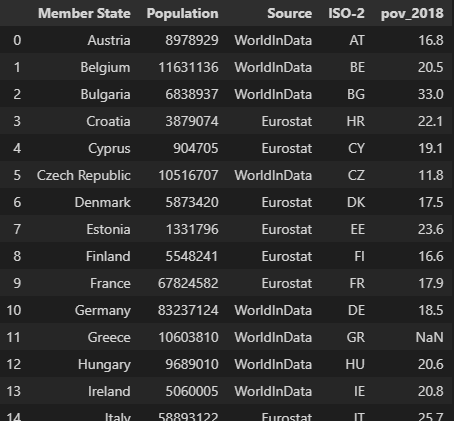

#### Exercise 14:

The first thing we want to do is merge `pop_df` with `iso_df`. There are two things to take into account here: 
- We want to merge them on the country name of the column but these columns have different names in each of the two DataFrames. 
- We want to do a merge that only keeps those rows that exist in `pop_df`. Why is that? Because this DataFrame contains all EU countries and no country from outside the EU. Because our research question only involves the EU, we would need to filter out the non-EU countries, a step we accomplish by doing the merge in this way. 

Call the merged DataFrame `pop_df`.

In [ ]:
# YOUR CODE HERE


The columns `Country` and `Member State` are redundant. To keep things clean, let's delete `Country`.

In [ ]:
# YOUR CODE HERE


#### Exercise 15:
Now both `pov_df` and `pop_df` have a common country identifier that we can use to merge them. In this merge, one thing is important:
- We again want to merge the DataFrames in such a way that only rows in `pop_df` are kept. This decision follows the same reasoning as in the previous question. 

Call the merged DataFrame `final_df`.

In [ ]:
# YOUR CODE HERE


## Answering our research question

`final_df` contains all the information you need to answer your research question of this session, and the data it contains is clean and ready to be used. Congratulations!

#### Exercise 16:
Now, this is not a data analysis or data visualization course. Therefore, we will not go into detail regarding how to evaluate the relationship between two variables. Simply use your new DataFrame to crate a simple scatter plot with the country population on the x-axis and the percentage of people at poverty risk on the y-axis (do label the axes and give some sort of title). 

In [ ]:
# YOUR CODE HERE


*Looking at your graph, what do you think about the relationship between the population size and poverty risk at the EU countries?*

This is of course not the end of the story and no scientific journal is going to publish the analysis we just did. Nonetheless, we learned quite a bit of data cleaning on the way!